
# Linear Regression with Tensorflow 

Reference 1:
https://www.tensorflow.org/tutorials/keras/regression

Reference 2:
https://stackabuse.com/tensorflow-2-0-solving-classification-and-regression-problems/

Reference 3:
https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970

The goal of this notebook is to build a linear regression model with TensorFlow



In [90]:
# import tensorflow 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
print(tf.__version__)

2.8.0


In [137]:
#import additional libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Reading in data 
1. Uploading a csv file 
2. From github 
3. Using tensorflow datasets
4. External resource 

In [152]:
#Loading data from a csv file 
#Loaing from a github account 
df=pd.read_csv('https://raw.githubusercontent.com/oluwole-packt/datasets/main/Fuel_Efficiency.csv', index_col=0)
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [153]:
#Loading data from a Local csv file
df=pd.read_csv('/content/Fuel_Efficiency.csv', index_col=0)
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [154]:
#checking the columns 
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

##Data preprocessing 

In [155]:
#rearranging the rows 
df= df[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin', 'MPG']]
#viewing the first five rows in the dataframe
df.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,MPG
0,8,307.0,130.0,3504.0,12.0,70,USA,18.0
1,8,350.0,165.0,3693.0,11.5,70,USA,15.0
2,8,318.0,150.0,3436.0,11.0,70,USA,18.0
3,8,304.0,150.0,3433.0,12.0,70,USA,16.0
4,8,302.0,140.0,3449.0,10.5,70,USA,17.0


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     398 non-null    int64  
 1   Displacement  398 non-null    float64
 2   Horsepower    392 non-null    float64
 3   Weight        398 non-null    float64
 4   Acceleration  398 non-null    float64
 5   Model Year    398 non-null    int64  
 6   Origin        398 non-null    object 
 7   MPG           398 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 28.0+ KB


We can see the total entries are 398 rows, however the horsepower row has a value of 392. Let us check this column to find out what is going on there. 

In [157]:
#Lets check if we have some missing values
df['Horsepower'].isnull().sum()

6

In [158]:
#Lets check the entire dataset for missing values
df.isnull().sum()

Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
MPG             0
dtype: int64

The number of missing values are quite small, in this scenario we will drop them. There are other methods of handling missing values. Although the exam will focus more on testing your modelling skills, data preprocessing will come in handy so I will refer you to this excellent book on data preprocessing by packt

Hands-On Data Preprocessing in Python: Learn how to effectively prepare data for successful data analytics by Roy Jafari.

In [159]:
#drop the missing values
df=df.dropna()

In [160]:
#Lets check the entire dataset for missing values
df.isnull().sum()

Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
MPG             0
dtype: int64

In [161]:
#Checking the data types of each attribute
df.dtypes

Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin           object
MPG             float64
dtype: object

In [162]:
#Converting categorical variables to numeric
df = pd.get_dummies(df, drop_first=True, prefix='Origin')
df.head()


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,MPG,Origin_Japan,Origin_USA
0,8,307.0,130.0,3504.0,12.0,70,18.0,0,1
1,8,350.0,165.0,3693.0,11.5,70,15.0,0,1
2,8,318.0,150.0,3436.0,11.0,70,18.0,0,1
3,8,304.0,150.0,3433.0,12.0,70,16.0,0,1
4,8,302.0,140.0,3449.0,10.5,70,17.0,0,1


In [166]:
df.corr()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,MPG,Origin_Japan,Origin_USA
Cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.777618,-0.404209,0.610494
Displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.805127,-0.440825,0.655936
Horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.778427,-0.321936,0.489625
Weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.832244,-0.447929,0.600978
Acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.423329,0.115020,-0.258224
Model Year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.580541,0.199841,-0.136065
MPG,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,1.000000,0.451454,-0.565161
Origin_Japan,-0.404209,-0.440825,-0.321936,-0.447929,0.115020,0.199841,0.451454,1.000000,-0.648583
Origin_USA,0.610494,0.655936,0.489625,0.600978,-0.258224,-0.136065,-0.565161,-0.648583,1.000000


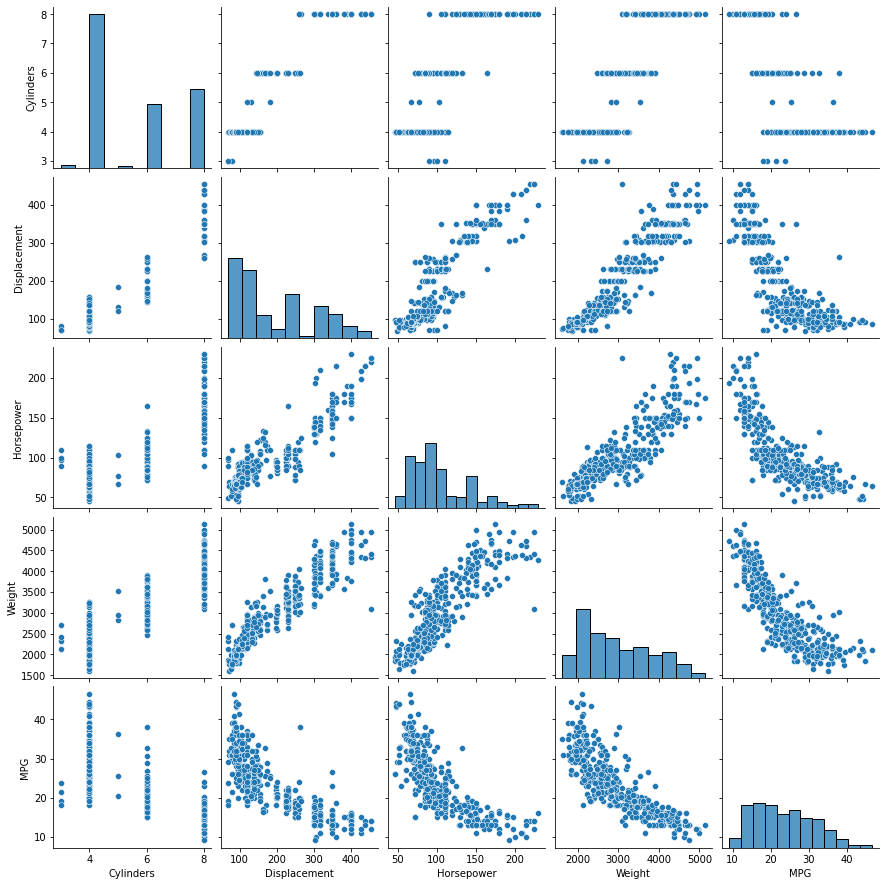

In [167]:
#Lets us visualize the relationship between these strongly correlated features and the Miles per gallon
sns.pairplot(df[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'MPG']])

# Model Building 

In [168]:
# Create X & y values
X = df.drop("MPG", axis=1)
y = df["MPG"]

In [173]:
# Create training and test sets
#We set the random state to ensure reproduciblility 

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=10) 

In [174]:
#Set random set for reproducilbility 
tf.random.set_seed(10)
#create a model using the Keras API 
model =Sequential([Dense(units=1,input_shape=[len(X_train.columns)])])
#compile the model 
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics = ['mae'])
#Fit the model 
model.fit(X_train,y_train, epochs =50) #number of times the model will go through training examples 


Epoch 1/50
10/10 [==============================] - 0s 2ms/step - loss: 42863.1211 - mae: 42863.1211
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 43013.9883 - mae: 43013.9883
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 43094.3789 - mae: 43094.3789
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 42592.9297 - mae: 42592.9297
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 43802.4297 - mae: 43802.4297
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 43524.6992 - mae: 43524.6992
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 44292.4453 - mae: 44292.4453
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 43289.9141 - mae: 43289.9141
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 43057.2773 - mae: 43057.2734
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 42909.9023 - mae: 

In [181]:
#Set the random seed
tf.random.set_seed(10)
#create a model 
model =Sequential([Dense(units=1,input_shape=[len(X_train.columns)])])
#compile the model 
model.compile(loss="mae", optimizer="SGD", metrics ="mae")
#fit the model 
history= model.fit(X_train,y_train, epochs =500) #number of times the model will go through training examples 


Epoch 1/500
10/10 [==============================] - 1s 3ms/step - loss: 43007.0977 - mae: 43007.0977
Epoch 2/500
10/10 [==============================] - 0s 2ms/step - loss: 43010.4531 - mae: 43010.4531
Epoch 3/500
10/10 [==============================] - 0s 3ms/step - loss: 43323.9727 - mae: 43323.9727
Epoch 4/500
10/10 [==============================] - 0s 2ms/step - loss: 43136.5312 - mae: 43136.5312
Epoch 5/500
10/10 [==============================] - 0s 3ms/step - loss: 42725.8750 - mae: 42725.8750
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 43123.8711 - mae: 43123.8711
Epoch 7/500
10/10 [==============================] - 0s 3ms/step - loss: 42955.0781 - mae: 42955.0781
Epoch 8/500
10/10 [==============================] - 0s 3ms/step - loss: 42972.9961 - mae: 42972.9961
Epoch 9/500
10/10 [==============================] - 0s 3ms/step - loss: 42733.1055 - mae: 42733.1055
Epoch 10/500
10/10 [==============================] - 0s 2ms/step - loss: 43043.29

dict_keys(['loss', 'mae'])


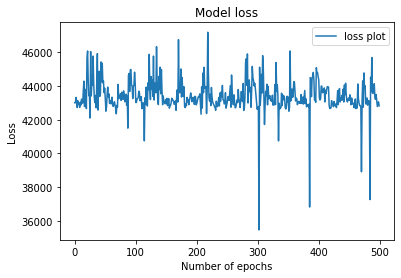

In [182]:
print(history.history.keys())
# Lets plot the loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['loss plot'], loc='upper right')
plt.show()

The model is clearly underfitting, hence we have to figure out how to improve our model to ensure it can make accruate predictions. 

In [184]:
#Set random set 
tf.random.set_seed(25)
#create a model 
model2 =Sequential([
                   Dense(units=64, activation='relu', input_shape=[len(X_train.columns)]),
                   Dense(units=1)
                   
                   ])
#compile the model 
model2.compile(loss="mae", optimizer="SGD", metrics ="mae")
#fit the model 
history2 =model2.fit(
    X_train, y_train, epochs=500)

Epoch 1/500
10/10 [==============================] - 1s 2ms/step - loss: 75847.9844 - mae: 75847.9844
Epoch 2/500
10/10 [==============================] - 0s 2ms/step - loss: 23.6520 - mae: 23.6520
Epoch 3/500
10/10 [==============================] - 0s 2ms/step - loss: 23.5520 - mae: 23.5520
Epoch 4/500
10/10 [==============================] - 0s 2ms/step - loss: 23.4520 - mae: 23.4520
Epoch 5/500
10/10 [==============================] - 0s 2ms/step - loss: 23.3520 - mae: 23.3520
Epoch 6/500
10/10 [==============================] - 0s 2ms/step - loss: 23.2520 - mae: 23.2520
Epoch 7/500
10/10 [==============================] - 0s 2ms/step - loss: 23.1520 - mae: 23.1520
Epoch 8/500
10/10 [==============================] - 0s 2ms/step - loss: 23.0520 - mae: 23.0520
Epoch 9/500
10/10 [==============================] - 0s 3ms/step - loss: 22.9520 - mae: 22.9520
Epoch 10/500
10/10 [==============================] - 0s 2ms/step - loss: 22.8520 - mae: 22.8520
Epoch 11/500
10/10 [=============

dict_keys(['loss', 'mae'])


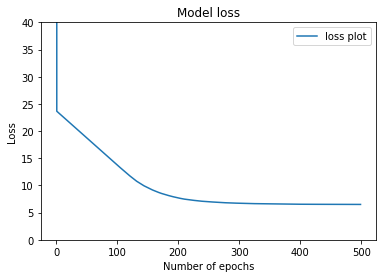

In [188]:
print(history2.history.keys())
# Lets plot the loss
plt.plot(history2.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['loss plot'], loc='upper right')
plt.ylim([0,40])
plt.show()

In [211]:
#Set random set 
tf.random.set_seed(10)
#create a model using the sequential API 

model3 =Sequential([
                   Dense(units=64, activation='relu', input_shape=[len(X_train.columns)]),
                   Dense(units=1)
                   
                   ])
#compile the model 
model3.compile(loss="mae", optimizer="Adam", metrics = ['mae'])
#fit our model 
history3 =model3.fit(
    X_train, y_train, epochs=500)

Epoch 1/500
10/10 [==============================] - 1s 4ms/step - loss: 23.4897 - mae: 23.4897
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 23.1728 - mae: 23.1728
Epoch 3/500
10/10 [==============================] - 0s 7ms/step - loss: 22.8596 - mae: 22.8596
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 22.5344 - mae: 22.5344
Epoch 5/500
10/10 [==============================] - 0s 7ms/step - loss: 22.1854 - mae: 22.1854
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 21.7967 - mae: 21.7967
Epoch 7/500
10/10 [==============================] - 0s 8ms/step - loss: 21.3545 - mae: 21.3545
Epoch 8/500
10/10 [==============================] - 0s 8ms/step - loss: 20.8570 - mae: 20.8570
Epoch 9/500
10/10 [==============================] - 0s 8ms/step - loss: 20.3132 - mae: 20.3132
Epoch 10/500
10/10 [==============================] - 0s 4ms/step - loss: 19.6963 - mae: 19.6963
Epoch 11/500
10/10 [===================

dict_keys(['loss', 'mae'])


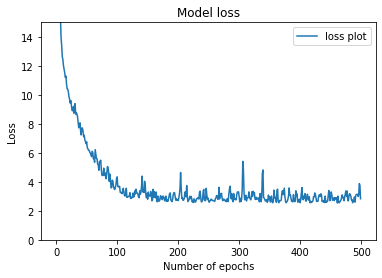

In [194]:
print(history3.history.keys())
# Lets plot the loss
plt.plot(history3.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['loss plot'], loc='upper right')
plt.ylim([0,15])
plt.show()

In [191]:
#Set random set 
tf.random.set_seed(25)
#create a model using the sequential API 

model4 =Sequential([
                   Dense(units=64, activation='relu', input_shape=[len(X_train.columns)]),
                    Dense(units=64, activation='relu'),
                    Dense(units=1)
                   
                   ])
#compile the model 
model4.compile(loss="mae", optimizer=tf.keras.optimizers.SGD(), metrics = "mae")
#fit our model 
history4 =model4.fit(
    X_train, y_train, epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 2ms/step - loss: 137919.4062 - mae: 137919.4062
Epoch 2/500
10/10 [==============================] - 0s 2ms/step - loss: 23.6520 - mae: 23.6520
Epoch 3/500
10/10 [==============================] - 0s 2ms/step - loss: 23.5520 - mae: 23.5520
Epoch 4/500
10/10 [==============================] - 0s 2ms/step - loss: 23.4520 - mae: 23.4520
Epoch 5/500
10/10 [==============================] - 0s 2ms/step - loss: 23.3520 - mae: 23.3520
Epoch 6/500
10/10 [==============================] - 0s 2ms/step - loss: 23.2520 - mae: 23.2520
Epoch 7/500
10/10 [==============================] - 0s 2ms/step - loss: 23.1520 - mae: 23.1520
Epoch 8/500
10/10 [==============================] - 0s 2ms/step - loss: 23.0520 - mae: 23.0520
Epoch 9/500
10/10 [==============================] - 0s 2ms/step - loss: 22.9520 - mae: 22.9520
Epoch 10/500
10/10 [==============================] - 0s 2ms/step - loss: 22.8520 - mae: 22.8520
Epoch 11/500
10/10 [===========

dict_keys(['loss', 'mae'])


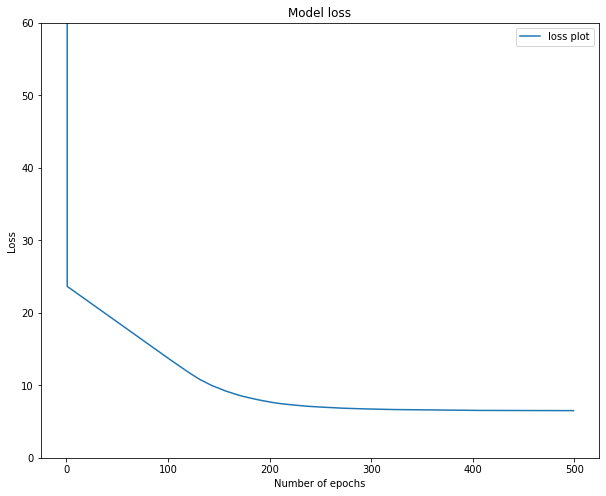

In [199]:
print(history4.history.keys())
# Lets plot the loss
plt.figure(figsize=[10,8])
plt.plot(history4.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['loss plot'], loc='upper right')
plt.ylim([0,60])
plt.show()

In [201]:
#Set random set 
tf.random.set_seed(25)
#create a model using the sequential API 

model3 =Sequential([
                   Dense(units=50, activation='relu', input_shape=[len(X_train.columns)]),
                   Dense(units=1)
                   
                   ])
#compile the model 
model3.compile(loss="mae", optimizer="Adam", metrics = 'mae')
#fit our model 
history3 =model3.fit(
    X_train, y_train, epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 2ms/step - loss: 635.1231 - mae: 635.1231
Epoch 2/500
10/10 [==============================] - 0s 2ms/step - loss: 449.8851 - mae: 449.8851
Epoch 3/500
10/10 [==============================] - 0s 2ms/step - loss: 269.3022 - mae: 269.3022
Epoch 4/500
10/10 [==============================] - 0s 2ms/step - loss: 91.8589 - mae: 91.8589
Epoch 5/500
10/10 [==============================] - 0s 2ms/step - loss: 42.1100 - mae: 42.1100
Epoch 6/500
10/10 [==============================] - 0s 2ms/step - loss: 23.4324 - mae: 23.4324
Epoch 7/500
10/10 [==============================] - 0s 2ms/step - loss: 21.3786 - mae: 21.3786
Epoch 8/500
10/10 [==============================] - 0s 2ms/step - loss: 15.4145 - mae: 15.4145
Epoch 9/500
10/10 [==============================] - 0s 2ms/step - loss: 13.9705 - mae: 13.9705
Epoch 10/500
10/10 [==============================] - 0s 2ms/step - loss: 13.4177 - mae: 13.4177
Epoch 11/500
10/10 [=============

In [202]:
#Evaluate the model on the best 
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 31310.1680 - mae: 31310.1680


[31310.16796875, 31310.16796875]

In [203]:
#Evaluate the model on the best 
model2.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 19.2480 - mae: 19.2480


[19.247976303100586, 19.247976303100586]

In [204]:
#Evaluate the model on the best 
model3.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 3.2226 - mae: 3.2226


[3.2225515842437744, 3.2225515842437744]

In [205]:
#Evaluate the model on the best 
model4.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 6.5904 - mae: 6.5904


[6.590427875518799, 6.590427875518799]

#Improving our model's performance

### Normalization

In [206]:
X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Japan,Origin_USA
0,8,307.0,130.0,3504.0,12.0,70,0,1
1,8,350.0,165.0,3693.0,11.5,70,0,1
2,8,318.0,150.0,3436.0,11.0,70,0,1
3,8,304.0,150.0,3433.0,12.0,70,0,1
4,8,302.0,140.0,3449.0,10.5,70,0,1


In [207]:
X.describe()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Japan,Origin_USA
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,0.201531,0.625000
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.401656,0.484742
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,0.000000,0.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,0.000000,1.000000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,0.000000,1.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000


We can see the attributes are of a different scale. Hence we want to bring the attribute to a uniform scale, hence we apply normalization. 

In [208]:
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_norm.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Japan,Origin_USA
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,1.0
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,1.0
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,1.0
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,1.0
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,1.0


In [209]:
X_norm.describe()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Japan,Origin_USA
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.494388,0.326646,0.317768,0.386897,0.448888,0.498299,0.201531,0.625000
std,0.341157,0.270398,0.209191,0.240829,0.164218,0.306978,0.401656,0.484742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.095607,0.157609,0.173589,0.343750,0.250000,0.000000,0.000000
50%,0.200000,0.214470,0.258152,0.337539,0.446429,0.500000,0.000000,1.000000
75%,1.000000,0.536822,0.434783,0.567550,0.537202,0.750000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [210]:
# Create training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_norm, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

In [212]:
#Set random set 
tf.random.set_seed(10)
#create a model using the sequential API 

model5 =Sequential([
                   Dense(units=64, activation='relu', input_shape=[len(X_train.columns)]),
                    Dense(units=64, activation ="relu"),
                    
                    Dense(units=1)
                   
                   ])
#compile the model 
model5.compile(loss="mae", optimizer=tf.keras.optimizers.RMSprop(0.001), metrics = ['mae'])
#fit our model 
early_stop=keras.callbacks.EarlyStopping(monitor='loss', patience=10)
history5 =model5.fit(
    X_train, y_train, epochs=500, callbacks=[early_stop])


Epoch 1/500
10/10 [==============================] - 1s 5ms/step - loss: 22.8088 - mae: 22.8088
Epoch 2/500
10/10 [==============================] - 0s 5ms/step - loss: 21.3561 - mae: 21.3561
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 19.4508 - mae: 19.4508
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 16.8787 - mae: 16.8787
Epoch 5/500
10/10 [==============================] - 0s 3ms/step - loss: 13.9383 - mae: 13.9383
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 11.9763 - mae: 11.9763
Epoch 7/500
10/10 [==============================] - 0s 3ms/step - loss: 10.7723 - mae: 10.7724
Epoch 8/500
10/10 [==============================] - 0s 4ms/step - loss: 9.8932 - mae: 9.8932
Epoch 9/500
10/10 [==============================] - 0s 3ms/step - loss: 9.0850 - mae: 9.0850
Epoch 10/500
10/10 [==============================] - 0s 4ms/step - loss: 8.2485 - mae: 8.2485
Epoch 11/500
10/10 [=========================

In [216]:
#Set random set 
tf.random.set_seed(25)
#create a model using the sequential API 

model6 =Sequential([
                   Dense(units=64, activation='relu', input_shape=[len(X_train.columns)]),
                    Dense(units=64, activation ="relu"),
                    
                    Dense(units=1)
                   
                   ])
#compile the model 
model6.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(), metrics = ['mae'])
#fit our model 
early_stop=keras.callbacks.EarlyStopping(monitor='loss', patience=10)
history6 =model6.fit(
    X_train, y_train, epochs=500, callbacks=[early_stop])


Epoch 1/500
10/10 [==============================] - 0s 2ms/step - loss: 23.5914 - mae: 23.5914
Epoch 2/500
10/10 [==============================] - 0s 2ms/step - loss: 23.1029 - mae: 23.1029
Epoch 3/500
10/10 [==============================] - 0s 3ms/step - loss: 22.4782 - mae: 22.4782
Epoch 4/500
10/10 [==============================] - 0s 2ms/step - loss: 21.6227 - mae: 21.6227
Epoch 5/500
10/10 [==============================] - 0s 2ms/step - loss: 20.3547 - mae: 20.3547
Epoch 6/500
10/10 [==============================] - 0s 2ms/step - loss: 18.4712 - mae: 18.4712
Epoch 7/500
10/10 [==============================] - 0s 2ms/step - loss: 15.6735 - mae: 15.6735
Epoch 8/500
10/10 [==============================] - 0s 2ms/step - loss: 12.2865 - mae: 12.2865
Epoch 9/500
10/10 [==============================] - 0s 2ms/step - loss: 10.0728 - mae: 10.0728
Epoch 10/500
10/10 [==============================] - 0s 2ms/step - loss: 9.0285 - mae: 9.0285
Epoch 11/500
10/10 [=====================

In [222]:
#Set random set 
tf.random.set_seed(25)
#create a model 
model7 =Sequential([
                   Dense(units=64, activation='relu', input_shape=[len(X_train.columns)]),
                   Dense(units=1)
                   
                   ])
#compile the model 
model7.compile(loss="mae", optimizer=tf.keras.optimizers.RMSprop(0.001), metrics ="mae")
#fit the model 
early_stop=keras.callbacks.EarlyStopping(monitor='loss', patience=10)
history7 =model7.fit(
    X_train, y_train, epochs=500, callbacks=[early_stop])

Epoch 1/500
10/10 [==============================] - 1s 3ms/step - loss: 23.2588 - mae: 23.2588
Epoch 2/500
10/10 [==============================] - 0s 3ms/step - loss: 22.8324 - mae: 22.8324
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 22.4415 - mae: 22.4415
Epoch 4/500
10/10 [==============================] - 0s 2ms/step - loss: 22.0354 - mae: 22.0354
Epoch 5/500
10/10 [==============================] - 0s 3ms/step - loss: 21.6068 - mae: 21.6068
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 21.1419 - mae: 21.1419
Epoch 7/500
10/10 [==============================] - 0s 3ms/step - loss: 20.6426 - mae: 20.6426
Epoch 8/500
10/10 [==============================] - 0s 3ms/step - loss: 20.1176 - mae: 20.1176
Epoch 9/500
10/10 [==============================] - 0s 2ms/step - loss: 19.5651 - mae: 19.5651
Epoch 10/500
10/10 [==============================] - 0s 2ms/step - loss: 18.9810 - mae: 18.9810
Epoch 11/500
10/10 [===================

In [218]:
#Evaluate the model on the best 
model5.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 1.8540 - mae: 1.8540


[1.8540281057357788, 1.8540281057357788]

In [219]:
#Evaluate the model on the best 
model6.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 1.9782 - mae: 1.9782


[1.9782038927078247, 1.9782038927078247]

In [223]:
#Evaluate the model on the best 
model7.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 1.9003 - mae: 1.9003


[1.9002639055252075, 1.9002639055252075]

In [224]:
loss, mae=model5.evaluate(X_test, y_test, verbose=0)

print("mae: {:5.2f} MPG".format(mae))

mae:  1.85 MPG


In [230]:
y_preds=model5.predict(X_test).flatten()
y_preds

array([25.58658 , 25.556803, 34.800297, 26.76334 , 27.89417 , 29.815916,
       11.834626, 30.433016, 18.309324, 30.685863, 13.994174, 22.169382,
       15.585788, 28.710636, 20.112257, 30.71227 , 18.862448, 33.370495,
       26.692339, 30.11894 , 18.548964, 39.411617, 36.126484, 15.313781,
       29.063728, 24.745184, 19.982603, 16.411346, 29.768293, 22.63386 ,
       13.76525 , 20.020874, 18.773476, 31.75815 , 12.877486, 37.232082,
       13.269685, 25.20791 , 13.329411, 12.206987, 13.990925, 27.546858,
       36.564484, 25.722666, 13.323449, 12.529729, 16.570944, 32.781406,
       23.443811, 30.566656, 13.179652, 24.323421, 22.05041 , 34.18083 ,
       23.847986, 15.934402, 18.399887, 19.4833  , 21.146362, 23.555012,
       12.078049, 19.458818, 23.642477, 22.544811, 27.271578, 28.415335,
       24.517939, 29.4201  , 19.417507, 12.503415, 22.332527, 13.914212,
       23.602531, 27.326689, 21.092737, 24.690676, 13.832807, 15.423953,
       24.20451 ], dtype=float32)

In [239]:
df_predictions = pd.DataFrame({'Ground_Truth': y_test, 'Model_prediction': y_preds}, columns=[ 'Ground_Truth', 'Model_prediction'])

In [241]:
df_predictions.head(10)

,Ground_Truth,Model_prediction
79,26.0,25.586580
276,21.6,25.556803
248,36.1,34.800297
56,26.0,26.763340
393,27.0,27.894171
205,28.0,29.815916
43,13.0,11.834626
235,26.0,30.433016
152,19.0,18.309324
117,29.0,30.685863


Now we have successfully ran a good number of experiments, trying out various hyperparameters in improving our model. 